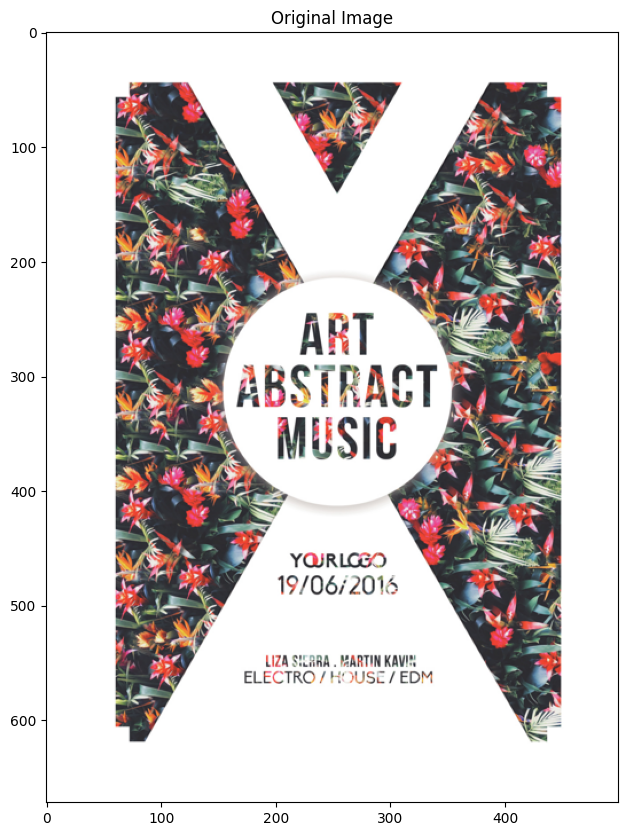

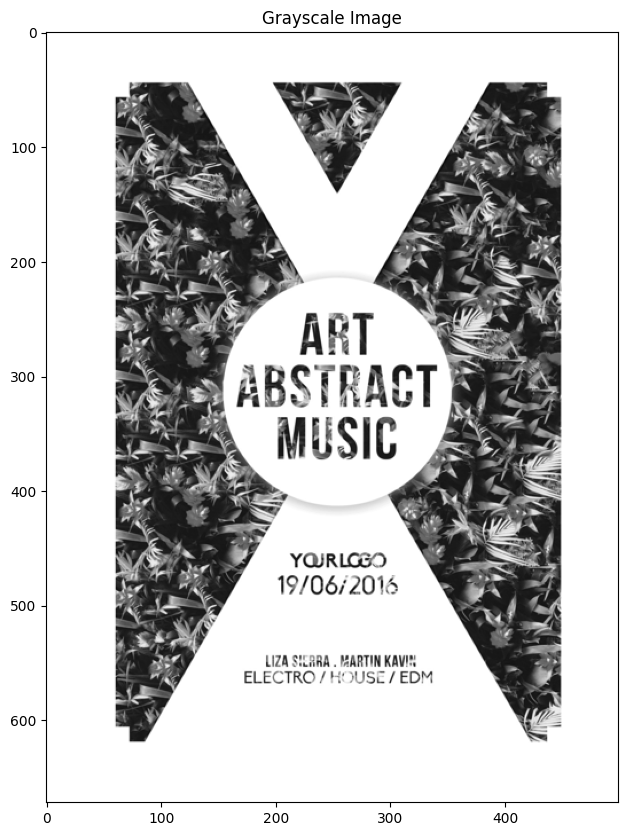

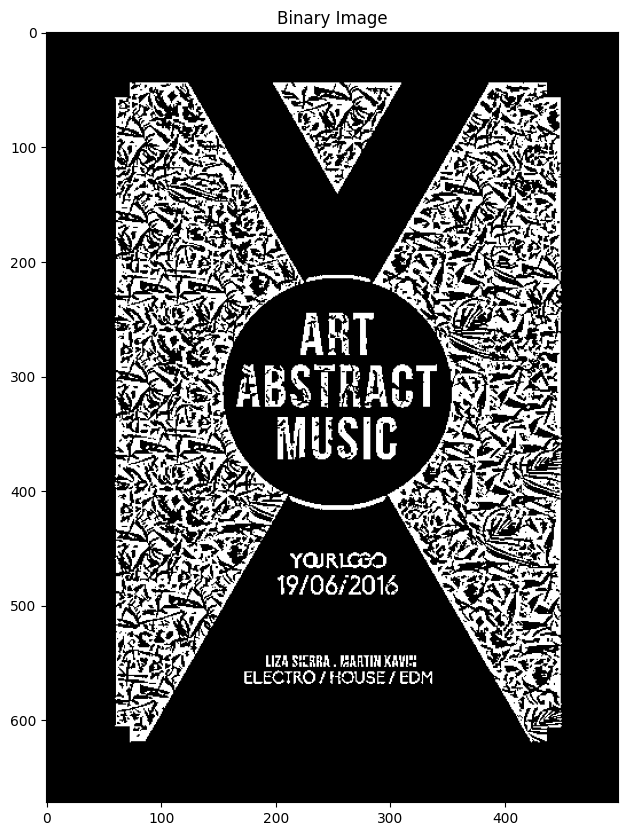

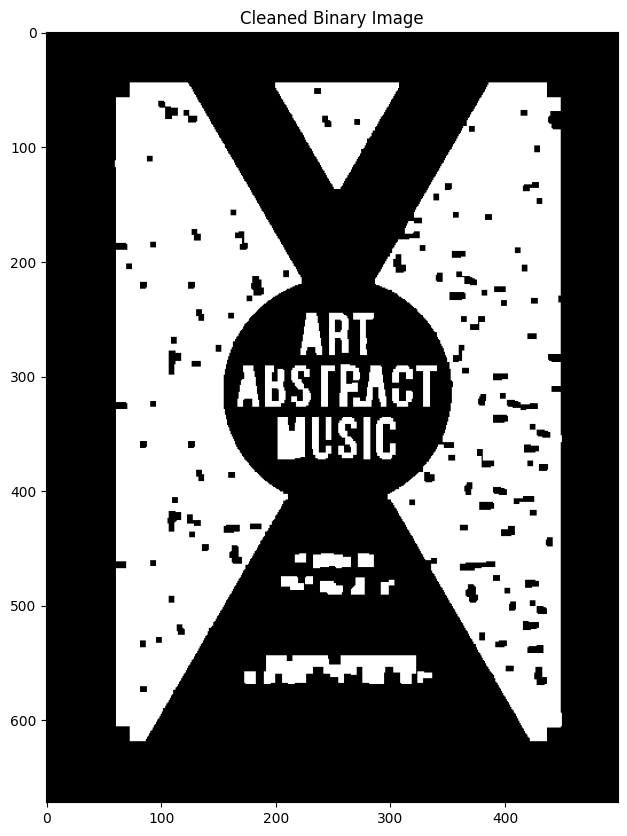

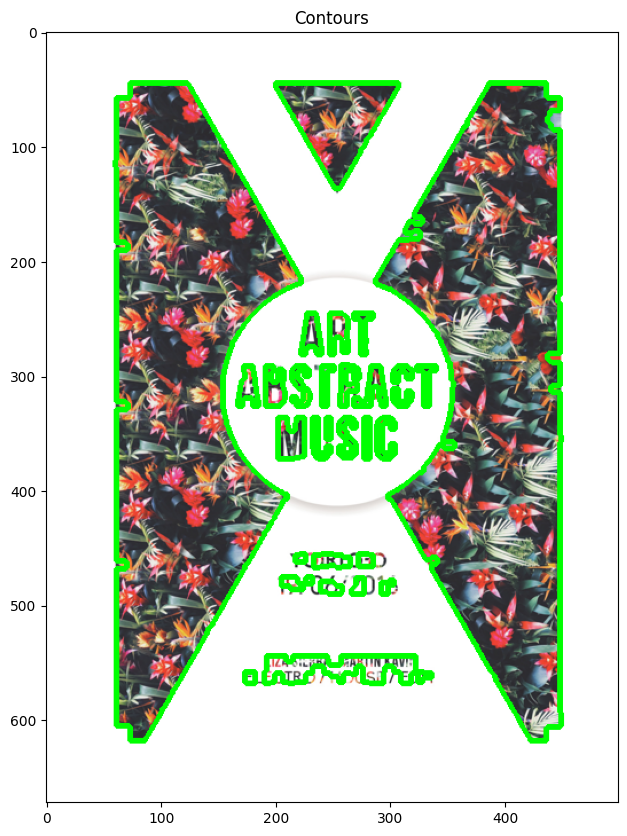

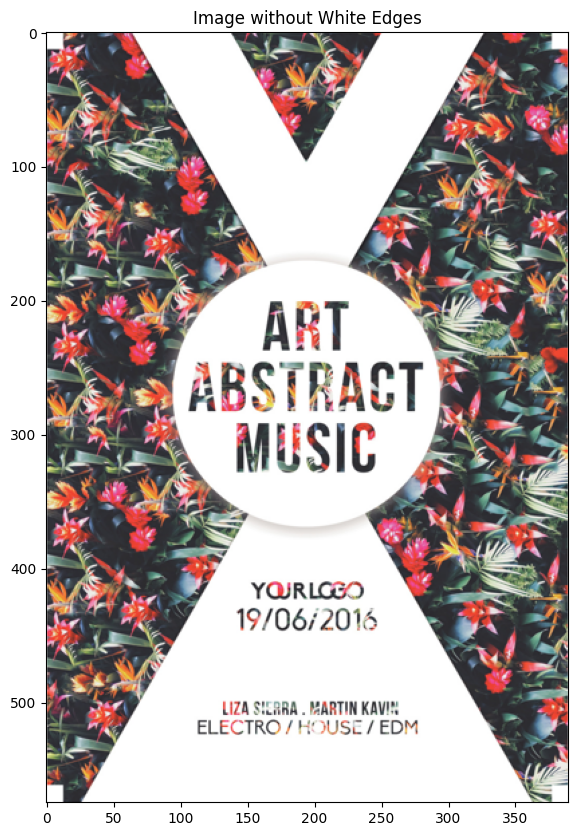

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def remove_white_edges(image_path, output_path):
    # 加载图像
    image = cv2.imread(image_path)

    # 显示原始图像
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.show()

    # 转换为灰度图
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 显示灰度图像
    plt.figure(figsize=(10, 10))
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()

    # 应用自适应阈值化以获取二值图像
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # 显示二值图像
    plt.figure(figsize=(10, 10))
    plt.imshow(binary, cmap='gray')
    plt.title('Binary Image')
    plt.show()

    # 应用形态学操作以平滑边缘
    kernel = np.ones((5, 5), np.uint8)
    binary_cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    binary_cleaned = cv2.morphologyEx(binary_cleaned, cv2.MORPH_OPEN, kernel)

    # 显示清理后的二值图像
    plt.figure(figsize=(10, 10))
    plt.imshow(binary_cleaned, cmap='gray')
    plt.title('Cleaned Binary Image')
    plt.show()

    # 在清理后的二值图像中找到轮廓
    contours, _ = cv2.findContours(binary_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 在图像上绘制轮廓以便可视化
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)

    # 显示带轮廓的图像
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.title('Contours')
    plt.show()

    # 获取包含所有重要轮廓的边界框
    x_min, y_min, x_max, y_max = image.shape[1], image.shape[0], 0, 0

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # 仅考虑面积较大的轮廓，以避免噪声
        if cv2.contourArea(contour) > 100:
            x_min = min(x_min, x)
            y_min = min(y_min, y)
            x_max = max(x_max, x + w)
            y_max = max(y_max, y + h)

    # 使用边界框坐标裁剪图像
    cropped_image = image[y_min:y_max, x_min:x_max]

    # 保存没有白边的裁剪图像
    cv2.imwrite(output_path, cropped_image)

    # 显示裁剪后的图像
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title('Image without White Edges')
    plt.show()

# 运行函数以去除白边并保存图像
remove_white_edges('poster.png', 'image_without_edge.jpg')

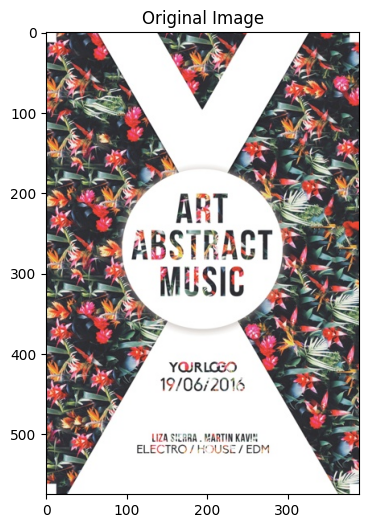

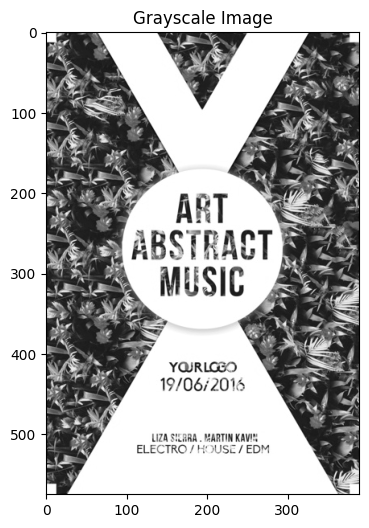

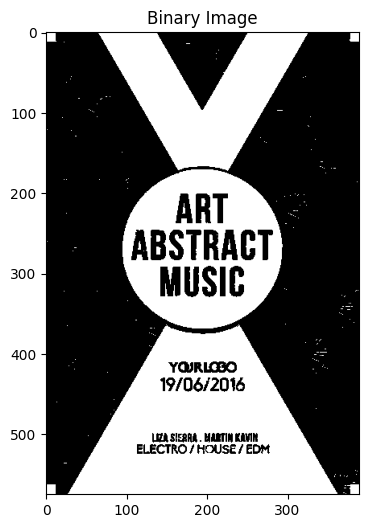

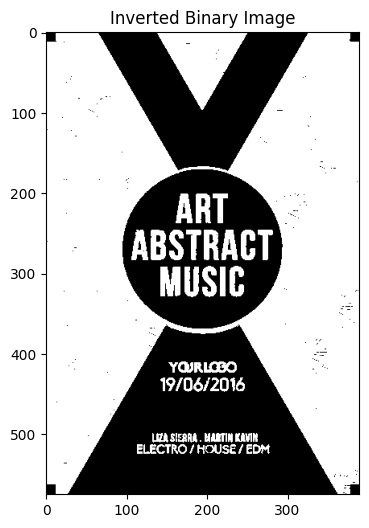

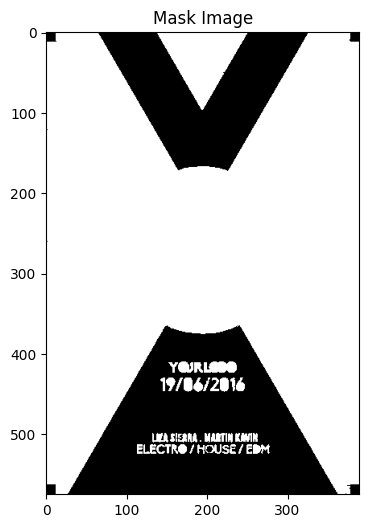

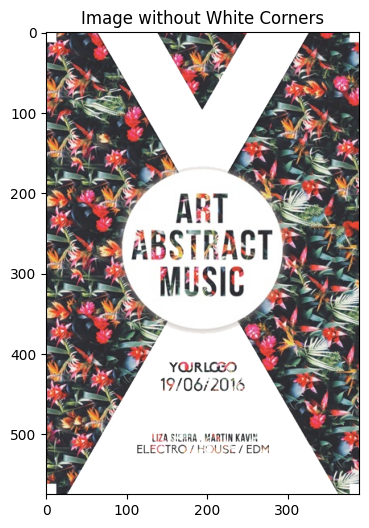

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def remove_white_corners(image_path, output_path):
    # 加载图片，保持原有透明度信息
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # 显示原始图片
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.show()

    # 转换为灰度图
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 显示灰度图片
    plt.figure(figsize=(6, 6))
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()

    # 应用阈值化处理获取二值图
    _, binary = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    # 显示二值图
    plt.figure(figsize=(6, 6))
    plt.imshow(binary, cmap='gray')
    plt.title('Binary Image')
    plt.show()

    # 反转二值图像（将白色区域变为黑色，反之亦然）
    binary_inverted = cv2.bitwise_not(binary)

    # 显示反转后的二值图像
    plt.figure(figsize=(6, 6))
    plt.imshow(binary_inverted, cmap='gray')
    plt.title('Inverted Binary Image')
    plt.show()

    # 在反转后的二值图像中寻找轮廓
    contours, _ = cv2.findContours(binary_inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 创建一个与图像同尺寸的掩膜，初始全为黑色
    mask = np.zeros_like(image)

    # 在掩膜中将找到的轮廓区域填充为白色
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # 显示掩膜图像
    plt.figure(figsize=(6, 6))
    plt.imshow(mask, cmap='gray')
    plt.title('Mask Image')
    plt.show()

    # 创建一个与灰度图同尺寸的 alpha 通道
    alpha_channel = np.ones_like(gray) * 255

    # 在掩膜为黑色的区域将 alpha 值设为 0
    alpha_channel[mask[:, :, 0] == 0] = 0

    # 将 alpha 通道合并到原图像中
    image_with_alpha = cv2.merge((image, alpha_channel))

    # 保存结果图像
    cv2.imwrite(output_path, image_with_alpha)

    # 显示最终结果，透明区域在图像中显示为透明
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image_with_alpha, cv2.COLOR_BGRA2RGBA))
    plt.title('Image without White Corners')
    plt.show()

# 指定输入和输出路径
input_image_path = 'image_without_edge.jpg'
output_image_path = 'image_without_corners.png'

# 运行函数以去除白色角落并保存图像
remove_white_corners(input_image_path, output_image_path)